In [148]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sqlite3
sns.set()
pd.options.display.float_format = '{:40,.0f}'.format

In [175]:
conn = sqlite3.connect('autovit.db')
raw_data = pd.read_sql_query('SELECT * FROM autovit_db', conn)

#Remove strings from number fields
raw_data1 = raw_data.replace(['\n', 'km', 'CP', 'cm3'],'', regex=True)

#Remove spaces from numeric columns so to_numeric can work
raw_data1['Mileage'] = raw_data1['Mileage'].replace(' ','', regex=True)
raw_data1['Mileage'] = pd.to_numeric(raw_data1['Mileage'], errors='coerce')

raw_data1['Engine_size'] = raw_data1['Engine_size'].replace(' ','', regex=True)
raw_data1['Engine_size'] = pd.to_numeric(raw_data1['Engine_size'], errors='coerce')

raw_data1['Horsepower'] = raw_data1['Horsepower'].replace(' ','', regex=True)
raw_data1['Horsepower'] = pd.to_numeric(raw_data1['Horsepower'], errors='coerce')

raw_data1['Price'] = raw_data1['Price'].replace(['n', ' '],'', regex=True)
raw_data1['Price'] = pd.to_numeric(raw_data1['Price'], errors='coerce')

raw_data1['Year'] = pd.to_numeric(raw_data1['Year'], errors='coerce')

In [176]:
raw_data1.isnull().sum()

Make                    0
Model                   0
Version                 0
Body_style              0
Year                    0
Mileage                63
Engine_size          1304
Fuel                    0
Horsepower           1662
Polution_standard       0
Transmission            0
Drivetrain              0
Condition               0
No_accident             0
Service_history         0
Registered_in_RO        0
Country_of_origin       0
Seller                  0
Price                   0
Currency                0
Location                0
dtype: int64

In [177]:
raw_data1.head()

,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,...,Drivetrain,Condition,No_accident,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location
0,Audi,A3,n,Masina de oras,2005,"199,494","1,600",Benzina,116,Euro 4,...,Fata,Second hand,Da,Da,n,Germania,Firma,4299,EUR,...
1,Nissan,Juke,n,SUV,2013,"65,445","1,598",Benzina,117,Euro 5,...,Fata,Second hand,n,Da,Da,Germania,Firma,10250,EUR,...
2,Suzuki,Swift,n,Masina de oras,2010,"144,000","1,300",Benzina,80,Euro 4,...,Fata,Second hand,Da,Da,n,Germania,Firma,3999,EUR,...
3,Mazda,CX-5,n,SUV,2014,"154,288","2,200",Diesel,150,Euro 6,...,Fata,Second hand,Da,Da,n,Italia,Firma,11700,EUR,...
4,Mitsubishi,ASX,n,SUV,2012,"162,000","1,800",Diesel,115,Euro 5,...,Fata,Second hand,Da,Da,n,Belgia,Firma,8900,EUR,...


In [178]:
raw_data1.describe(include='all')

,Make,Model,Version,Body_style,Year,Mileage,Engine_size,Fuel,Horsepower,Polution_standard,...,Drivetrain,Condition,No_accident,Service_history,Registered_in_RO,Country_of_origin,Seller,Price,Currency,Location
count,15992,15992,15992,15992,"15,992","15,929","14,688",15992,"14,330",15992,...,15992,15992,15992,15992,15992,15992,15992,"15,992",15992,15992
unique,66,588,228,9,nan,nan,nan,6,nan,8,...,5,2,2,2,2,25,2,nan,2,1203
top,Volkswagen,Passat,n,SUV,nan,nan,nan,Diesel,nan,Euro 6,...,Fata,Second hand,Da,Da,n,n,Firma,nan,EUR,...
freq,2347,686,10335,5022,nan,nan,nan,12194,nan,6507,...,6365,15191,10768,10074,10357,6047,10354,nan,15967,727
mean,NaN,NaN,NaN,NaN,"2,013","133,182","2,064",NaN,174,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"21,848",NaN,NaN
std,NaN,NaN,NaN,NaN,5,"92,287",651,NaN,83,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"185,971",NaN,NaN
min,NaN,NaN,NaN,NaN,"1,938",1,599,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
25%,NaN,NaN,NaN,NaN,"2,010","59,000","1,598",NaN,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,150",NaN,NaN
50%,NaN,NaN,NaN,NaN,"2,014","145,000","1,991",NaN,150,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"12,150",NaN,NaN
75%,NaN,NaN,NaN,NaN,"2,017","196,500","2,145",NaN,195,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"25,556",NaN,NaN


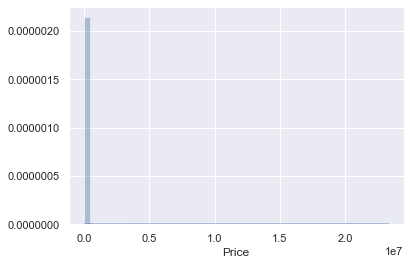

In [179]:
sns.distplot(raw_data1['Price'])

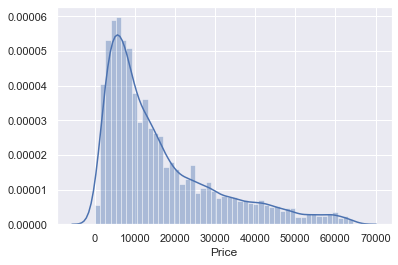

In [182]:
q = raw_data1['Price'].quantile(0.95)
data_1 = raw_data1[raw_data1['Price']<q]
sns.distplot(data_1['Price'])